# Outlier Detection and Removal from Boston Housing Price Dataset


In [1]:
# Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
# Load the data
boston = load_boston()

# Find features and target
x = boston.data
y = boston.target

#Find the dic keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# Find feature-names
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
# Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
# Create Dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df_o1 = boston_df
boston_df.shape

(506, 13)

# Detecting Outliers

## Box Plot

A box plot is a method for graphically depicting groups of numerical data through their quartiles. 

Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. 

Outliers may be plotted as individual points.

**The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2).** 

**The whiskers extend from the edges of box to show the range of the data. **

**By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.**

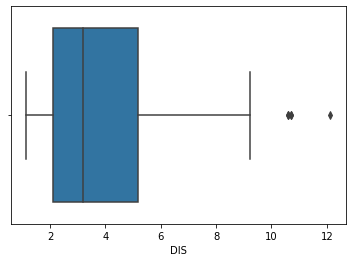

In [6]:
#Oulier detection - Univarite - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=boston_df['DIS'])

Above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

Here we analysed Uni-variate outlier i.e. we used DIS column only to check the outlier. 

But we can do multivariate outlier analysis too. Can we do the multivariate analysis with Box plot? 

It depends, if you have a categorical values then you can use that with any continuous variable and do multivariate outlier analysis. 

As we do not have categorical value in our Boston Housing dataset, we might need to forget about using box plot for multivariate outlier analysis.

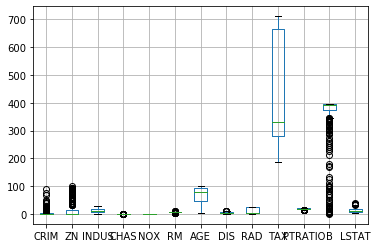

In [7]:
boston_df.boxplot()

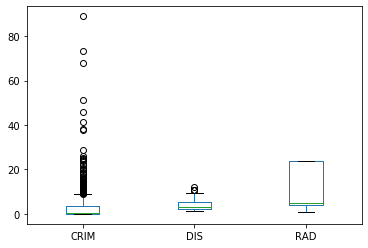

In [8]:
boston_df.boxplot(column=['CRIM','DIS','RAD'], grid=False)

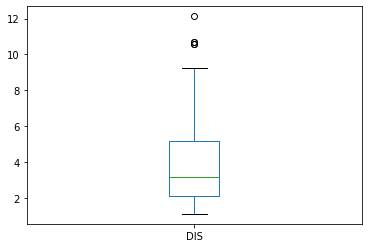

In [9]:
boston_df.boxplot(column=['DIS'], grid=False)

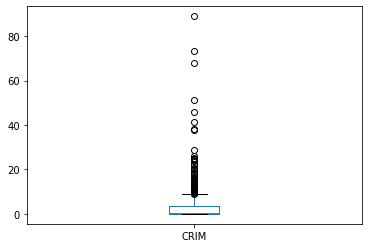

In [10]:
boston_df.boxplot(column=['CRIM'], grid=False)

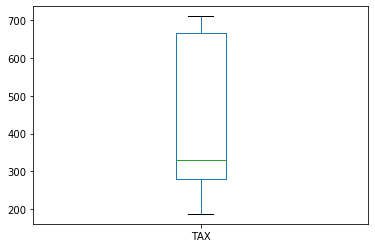

In [11]:
boston_df.boxplot(column=['TAX'], grid=False)

## Scatter Plot

**A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.** 

The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.


As the definition suggests, the scatter plot is the collection of points that shows values for two variables. 

We can try and draw scatter plot for two variables from our housing dataset

In [12]:
# Check the correlation between features before multivariate outlier analysis
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

#plt.figure(figsize= (10,10), dpi=100)
#sns.heatmap(boston_df.corr())

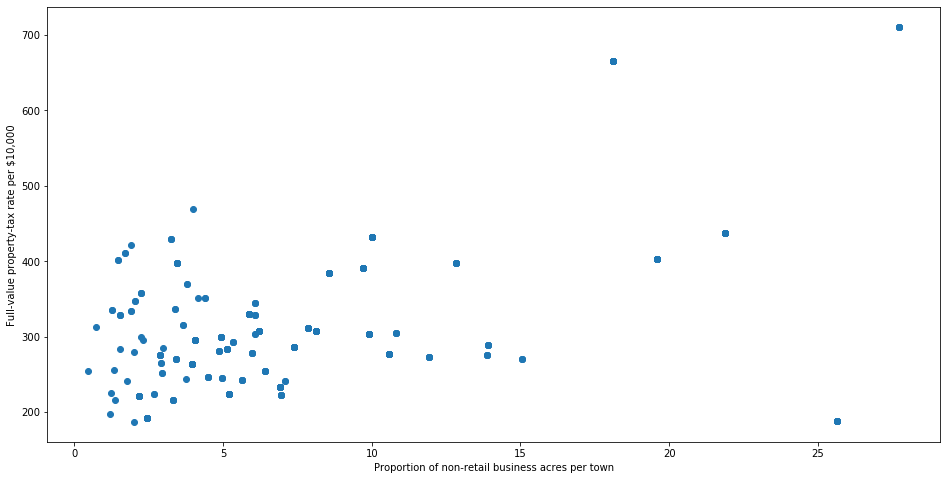

In [13]:
#Multivariate outlier analysis
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

## Use Mathematical Functions

## Z-Score

The **Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value** of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. 

Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

How does this help in identifying the outliers? 

**While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero.** 

**These data points which are way too far from zero will be treated as the outliers.** 

In most of the cases a **threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.**

We will use Z-score function defined in **scipy library** to detect the outliers.

In [14]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [15]:
z.shape

(506, 13)

Looking the code and the output above, it is difficult to say which data point is an outlier. 

Let’s try and define a threshold to identify an outlier.


In [16]:
threshold = 3
print(np.where(z > threshold))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int32), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Don’t be confused by the results. 

The first array contains the list of row numbers and second array respective column numbers of the data points satisfying the condition z>3. 

Which means z[55][1] have a Z-score higher than 3.

In [17]:
print(z[55][1])

3.375038763517309


So, the data point — 55th record on column ZN is an outlier.

## IQR Score

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

The **interquartile range (IQR)**, also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.


In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR,

In [20]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. 

The below code will give an output with some true and false values. 

The data point where we have **False that means these values are valid** whereas **True indicates presence of an outlier**.

In [21]:
print(boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

# Removing Outliers 

### Z-Score

We have seen how one can detect the outlier using Z-score.

Now we want to remove or filter the outliers and get the clean data. 

This can be done with just one line code as we have already calculated the Z-score.

In [22]:
boston_df_o = boston_df_o[(z < 3).all(axis=1)]

In [23]:
boston_df.shape

(506, 13)

In [24]:
boston_df_o.shape

(415, 13)

So, above code removed around 90+ rows from the dataset i.e. outliers have been removed.

### IQR Score

We can use the IQR score to filter out the outliers by keeping only valid values.

In [25]:
boston_df_o1 = boston_df

In [26]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [27]:
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)

The above code will remove the outliers from the dataset.



## Conclusion

There are multiple ways to detect and remove the outliers but the methods, we have used for this exercise, are widely used and easy to understand.

Whether an outlier should be removed or not. 

Every data analyst/data scientist might get these thoughts once in every problem they are working on. 

Some explanations could be stated as follows :-

Bad data, wrong calculation, these can be identified as Outliers and should be dropped but at the same time you might want to correct them too, as they change the level of data i.e. mean which cause issues when you model your data. 

For example- 5 people get salary of 10K, 20K, 30K, 40K and 50K and suddenly one of the person start getting salary of 100K. 

Consider this situation as, you are the employer, the new salary update might be seen as biased and you might need to increase other employee’s salary too, to keep the balance. 

So, there can be multiple reasons you want to understand and correct the outliers.